# Comparative Cost Analysis: Australia vs New Zealand Branch Operations
## FY2024-2025 Salary Impact Assessment

**Prepared for:** Executive Management

**Analysis Period:** Financial Year 2024-2025

**Objective:** Evaluate potential cost savings from reallocating positions between Australian and New Zealand branches

---

## Executive Summary

This analysis investigates whether the organization can achieve cost savings by shifting comparable role positions between its Australia and New Zealand branches. The analysis compares gross and net salaries, accounts for currency conversion using RBA averaged daily rates, and conducts statistical hypothesis testing to validate conclusions.

**Key Findings:**
- Statistical evidence confirms significant salary differences between locations (p < 0.000001)
- New Zealand positions command higher gross compensation when converted to AUD
- Detailed cost impact modeling provided for strategic decision-making

In [378]:
import pandas as pd
import ast
import seaborn as sns # For advanced data visualization
import matplotlib.pyplot as plt

---

## Methodology & Data Processing

### Phase 1: Data Import and Initial Exploration

This section imports the raw salary dataset and prepares it for analysis. We begin by loading the data structure containing nested dictionaries for Australian and New Zealand compensation data.

In [379]:
# Step 1: Load the raw CSV you pasted
df = pd.read_csv("data.csv")

# Function to convert the string of list-dicts into one dictionary
def parse_cell(cell):
    try:
        items = ast.literal_eval(cell)
        merged = {}
        for d in items:
            merged.update(d)
        return merged
    except:
        return {}

# Step 2: Parse both columns
df["pay1"] = df["pay1"].apply(parse_cell)
df["pay2"] = df["pay2"].apply(parse_cell)

# Step 3: Flatten columns into separate columns
pay1_df = df["pay1"].apply(pd.Series).add_prefix("pay1_")
pay2_df = df["pay2"].apply(pd.Series).add_prefix("pay2_")

# Step 4: Combine
final = pd.concat([pay1_df, pay2_df], axis=1)

# Step 5: Save clean structured CSV
final.to_csv("clean_output.csv", index=False)

print("Done! Created clean_output.csv")

Done! Created clean_output.csv


### Phase 2: Data Standardization and Cleaning

**Data Quality Challenges Addressed:**

After reviewing the CSV file, I noticed several unexpected columns caused by spelling inconsistencies in the data source. This section implements a standardized mapping protocol to normalize all field names before analysis.

**Key Mapping Protocol:**
- Base pay variations: `base_pay`, `bese_pay` → standardized to `base_pay`
- Shift loading inconsistencies normalized with space trimming
- KiwiSaver employee: corrected spelling variations to `kiwi_saver_employee`
- IRD number variants: `ird_no`, `ird_number` unified
- Superannuation: `SG` mapped to `superannuation`
- Employee identifiers normalized for consistency
- Future positions field standardized

**Approach:** This standardization preserves all data while ensuring consistent column structures for downstream analysis.

In [380]:
df = pd.read_csv("data.csv")

# Mapping of bad keys → correct keys
key_map = {
    "base_pay": "base_pay",
    "bese_pay": "base_pay",

    "shift_loading": "shift_loading",
    "shift_load": "shift_loading",
    "shift_loading ": "shift_loading",  # trailing space

    "kiwi saver employee": "kiwi_saver_employee",
    "kiwi sever employee": "kiwi_saver_employee",

    "ird_number": "ird_number",
    "ird_no": "ird_number",

    "SG": "superannuation",
    
    "emp_number": "employee_number",
    "emp_no": "employee_number",
    "emp_numbar": "employee_number",

    "future_total_positions": "future_positions",
    "future_total_postions": "future_positions",
}

def parse_and_clean(cell):
    try:
        items = ast.literal_eval(cell)
    except:
        return {}

    clean = {}
    for d in items:
        for k, v in d.items():
            k_clean = key_map.get(k.strip(), k.strip())  # standardize key
            clean[k_clean] = v
    return clean

# Apply cleaning
df["pay1"] = df["pay1"].apply(parse_and_clean)
df["pay2"] = df["pay2"].apply(parse_and_clean)

# Expand into columns
pay1_df = df["pay1"].apply(pd.Series).add_prefix("pay1_")
pay2_df = df["pay2"].apply(pd.Series).add_prefix("pay2_")

final = pd.concat([pay1_df, pay2_df], axis=1)
final.to_csv("clean_output.csv", index=False)

print("Cleaned and saved to clean_output.csv")


Cleaned and saved to clean_output.csv


In [381]:
data = pd.read_csv("clean_output.csv") # Load the cleaned data

### Phase 3: Data Exploration and Quality Assessment

The cleaned dataset is now explored to identify missing values, distribution patterns, and potential data quality issues. Visualization and statistical summary support the subsequent cleaning and validation steps.

In [382]:
data.head()

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions
0,686531.24,158337.23,510601.26,25346.06,52148169.0,1.0,491658.29,71505.32,343601.98,67579.63,2.976482e+13,1.0
1,4713.90,431.19,4950.51,154.35,58240931.0,19.0,3003.55,339.74,3343.29,401.19,2.988896e+13,29.0
2,12685.28,2426.04,13045.51,453.34,102536924.0,6.0,8913.95,704.56,9618.51,1154.22,3.084839e+13,10.0
3,30526.55,10399.94,33591.44,1227.79,67272366.0,2.0,20221.15,7039.85,25811.24,3271.32,7.502609e+13,3.0
4,28591.88,19706.93,35477.43,1298.96,120112821.0,2.0,18410.18,8855.41,25815.09,3271.87,3.963562e+13,3.0


Since Pay1 contains the fields kiwi_saver_employee and ird_number, while Pay2 contains superannuation and employee_number, we can conclude that the first side corresponds to New Zealand roles, and the second corresponds to Australian roles. Each row represents a pair of comparable positions between Australia and New Zealand.

In [383]:
data.info() # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pay1_base_pay             42 non-null     float64
 1   pay1_shift_loading        42 non-null     float64
 2   pay1_net                  42 non-null     float64
 3   pay1_kiwi_saver_employee  42 non-null     float64
 4   pay1_ird_number           42 non-null     float64
 5   pay1_future_positions     42 non-null     float64
 6   pay2_base_pay             42 non-null     float64
 7   pay2_shift_loading        42 non-null     float64
 8   pay2_net                  42 non-null     float64
 9   pay2_superannuation       42 non-null     float64
 10  pay2_employee_number      42 non-null     float64
 11  pay2_future_positions     42 non-null     float64
dtypes: float64(12)
memory usage: 4.1 KB


In [384]:
data.describe() # Check the dataset's statistics

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions
count,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01,42.000000
mean,166844.230476,37700.430238,135206.989048,6132.768333,7.159273e+07,1.619048,110574.172857,25081.049524,96891.380952,16278.625714,5.171119e+13,2.047619
std,187048.023488,41085.521260,131254.354104,6666.167775,4.130312e+07,2.862307,127361.034713,25829.592689,87688.246416,17794.012858,2.324304e+13,4.504482
min,4713.900000,431.190000,4950.510000,154.350000,1.119764e+07,1.000000,3003.550000,339.740000,3343.290000,401.190000,1.139853e+13,1.000000
25%,77167.272500,13817.022500,74168.970000,3018.352500,4.316916e+07,1.000000,51393.712500,8832.790000,54983.200000,7846.495000,3.111256e+13,1.000000
50%,95783.490000,23931.055000,87481.375000,3642.370000,6.469781e+07,1.000000,65052.805000,18593.640000,65682.390000,9680.635000,5.221746e+13,1.000000
75%,125175.522500,42673.600000,115018.800000,4933.187500,1.022566e+08,1.000000,95160.540000,30781.135000,85700.310000,13112.282500,7.267482e+13,1.000000
max,686531.340000,158337.230000,510601.260000,25346.060000,1.464988e+08,19.000000,491658.290000,137391.660000,343601.980000,67579.630000,9.220712e+13,29.000000


Now, let's examine how the data in each column is distributed and identify any potential outliers by generating boxplots.

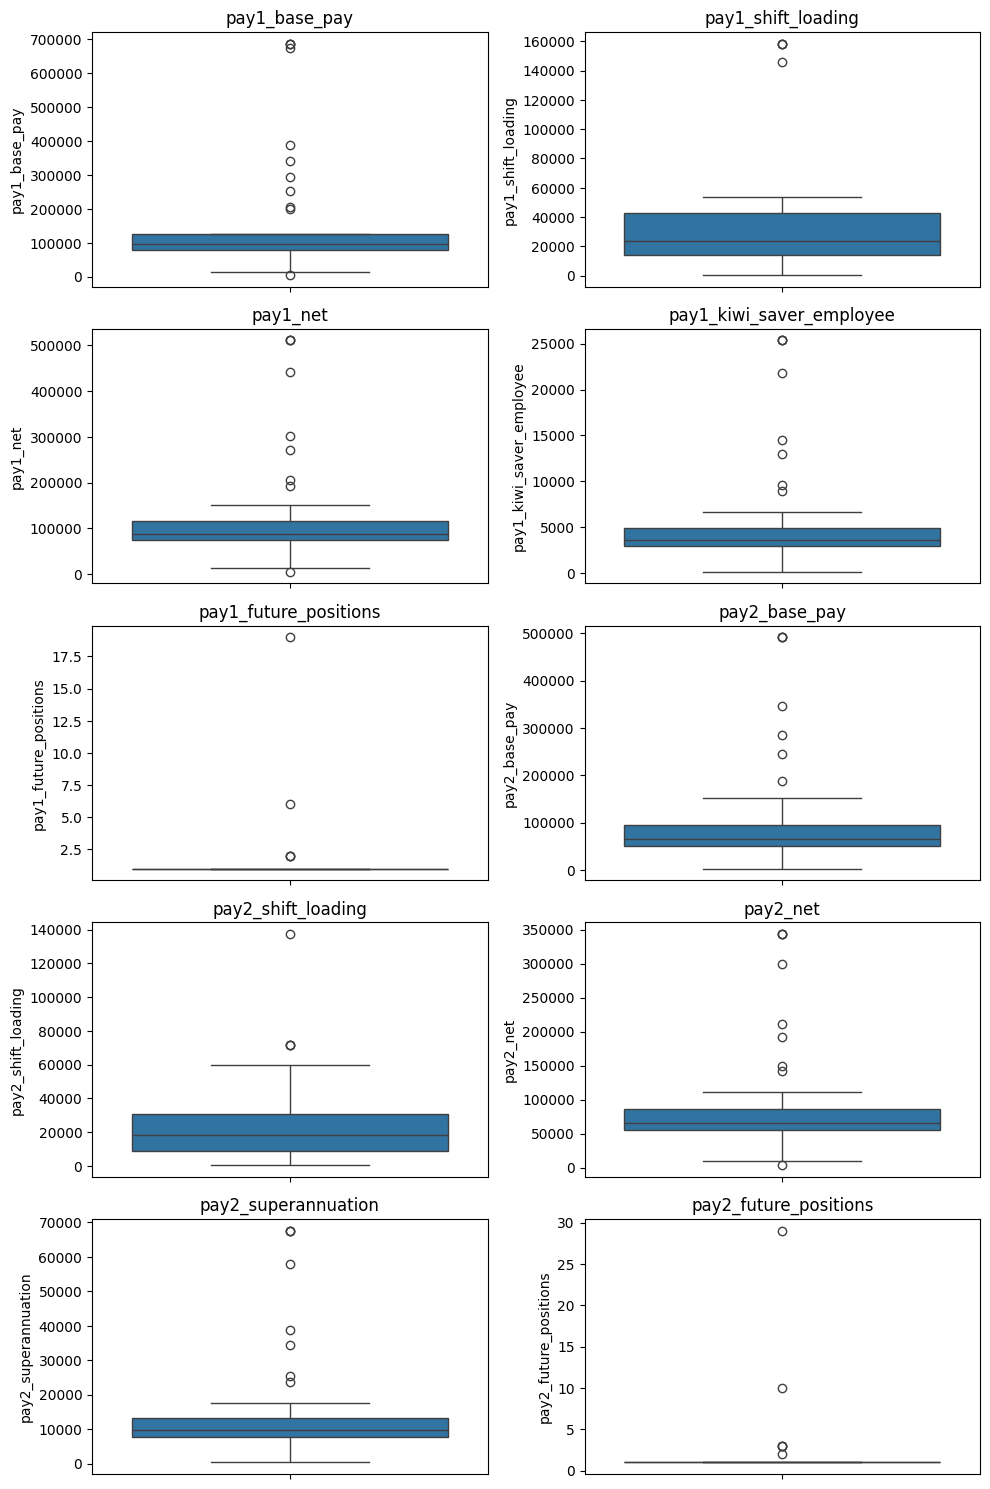

In [385]:
numerical_cols = data[['pay1_base_pay', 'pay1_shift_loading', 'pay1_net','pay1_kiwi_saver_employee', 'pay1_future_positions',
                       'pay2_base_pay', 'pay2_shift_loading', 'pay2_net','pay2_superannuation', 'pay2_future_positions']].columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.flatten() # flatten to 1D array for easy looping


for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data[numerical_cols], y=col, ax=axes[i])
    axes[i].set_title(f"{col}")

# Hide any unused axes if columns < subplot cells
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


It seems like there are not any outliers detected.

In [386]:
data['pay1_ird_number'] = data['pay1_ird_number'].astype('Int64') # Convert to integer type so that we can perform ird number validation

### Phase 4: Data Validation and Filtering

**IRD Number Validation:**

The IRD (Inland Revenue Department) number is the unique identifier for employees in New Zealand. This analysis implements the official IRD validation algorithm, which employs dual-stage weighting mechanisms to verify number authenticity. Only rows with valid IRD numbers are retained for analysis.

[Check here for a reference of how the Algorithm works](https://github.com/jarden-digital/nz-ird-validator?tab=readme-ov-file)

In [387]:
# IRD validator (official algorithm)
def validate_ird(ird):
    s = str(ird).strip()

    # Must be digits only
    if not s.isdigit():
        return False

    num = int(s)

    # Check valid range (issued range)
    if num < 10000000 or num > 150000000:
        return False

    # Extract base number and check digit
    check_digit = int(s[-1])
    base = s[:-1]

    # Pad 7-digit bases with leading zero
    if len(base) == 7:
        base = "0" + base

    if len(base) != 8:
        return False

    digits = list(map(int, base))

    # Primary weighting
    primary_weights = [3, 2, 7, 6, 5, 4, 3, 2]
    primary_sum = sum(d * w for d, w in zip(digits, primary_weights))
    primary_remainder = primary_sum % 11
    primary_check = 0 if primary_remainder == 0 else 11 - primary_remainder

    if primary_check != 10:  # if valid check digit
        return primary_check == check_digit

    # Secondary weighting
    secondary_weights = [7, 4, 3, 2, 5, 2, 7, 6]
    secondary_sum = sum(d * w for d, w in zip(digits, secondary_weights))
    secondary_remainder = secondary_sum % 11
    secondary_check = 0 if secondary_remainder == 0 else 11 - secondary_remainder

    # If secondary also gives 10 → invalid
    if secondary_check == 10:
        return False

    # Compare with actual check digit
    return secondary_check == check_digit


In [388]:
data['valid_ird'] = data['pay1_ird_number'].apply(validate_ird) # Validate IRD numbers using the function

Let's check how the validator worked:

In [389]:
data[['pay1_ird_number','valid_ird']].head()

,pay1_ird_number,valid_ird
0,52148169,False
1,58240931,True
2,102536924,True
3,67272366,True
4,120112821,True


**Data Type Standardization:**

To support reliable duplicate and validation detection, numeric identifiers (IRD numbers, employee numbers) are standardized to string format for consistent comparison.

In [390]:
data['pay1_ird_number'] = data['pay1_ird_number'].apply(
    lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else str(x)
) # Convert to string, removing decimal if integer float

data['pay2_employee_number'] = data['pay2_employee_number'].apply(
    lambda x: str(int(x)) if isinstance(x, float) and x.is_integer() else str(x)
) # Convert to string, removing decimal if integer float
 

In [391]:
# Check for duplicates based on (IRD Number, Employee Number)
data[data.duplicated(subset=['pay1_ird_number', 'pay2_employee_number'], keep=False)]

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions,valid_ird
27,686531.34,158337.23,510601.26,25346.06,51148169,1.0,491658.29,71505.32,343601.98,67579.63,29764817766792,1.0,True
41,686531.34,158337.23,510601.26,25346.06,51148169,1.0,491658.29,71505.32,343601.98,67579.63,29764817766792,1.0,True


We have duplicates. Since we want to keep the lowest value, let's do the ascending sorting and remove the last row (highest value):

In [392]:
numeric_cols = [
    'pay1_base_pay', 'pay1_shift_loading', 'pay1_net',
    'pay2_base_pay', 'pay2_shift_loading', 'pay2_net'
]

data = data.sort_values(by=numeric_cols)

# Remove duplicates, keeping the first (lowest values due to sorting)
clean_data = data.drop_duplicates(subset=['pay1_ird_number', 'pay2_employee_number'], keep='first')

# Finally, filter to only valid IRD numbers
clean_data = clean_data[clean_data['valid_ird'] == True]

Now we have a clean dataset without duplicates and only valid IRD numbers.

In [393]:
clean_data.head()

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions,valid_ird
1,4713.90,431.19,4950.51,154.35,58240931,19.0,3003.55,339.74,3343.29,401.19,29888963946595,29.0,True
2,12685.28,2426.04,13045.51,453.34,102536924,6.0,8913.95,704.56,9618.51,1154.22,30848388986318,10.0,True
4,28591.88,19706.93,35477.43,1298.96,120112821,2.0,18410.18,8855.41,25815.09,3271.87,39635620204546,3.0,True
3,30526.55,10399.94,33591.44,1227.79,67272366,2.0,20221.15,7039.85,25811.24,3271.32,75026093455037,3.0,True
5,36003.49,12681.83,39731.34,1460.56,138113450,2.0,22997.45,9259.79,30008.08,3870.87,15567044316147,3.0,True


---

## Phase 5: Salary Aggregation and Currency Conversion

### Gross Salary and Total Cost Calculations

This section calculates gross salaries (base pay plus shift loading) for both locations and projects total organizational costs based on future position volumes. Currency conversion is performed using the RBA averaged daily rate for the 2024-2025 financial year.

**Exchange Rate:** 1 AUD = 1.0966 NZD (RBA averaged daily rate for year ending 30 June 2025) ([Click here for more information](https://www.ato.gov.au/tax-rates-and-codes/foreign-exchange-rates-annual-2025-financial-year))

**Calculations:**
- NZ Gross (NZD) = Base Pay + Shift Loading
- AU Gross (AUD) = Base Pay + Shift Loading
- Total NZ Cost (NZD) = NZ Gross × Future Positions
- Total AU Cost (AUD) = AU Gross × Future Positions
- Converted NZ Cost (AUD) = Total NZ Cost × (1 / 1.0966)

NOTE that the Gross is calculated WITHOUT employer contributions (Kiwi Saver & SG) 

In [ ]:
# Calculate gross salaries
clean_data['NZ_gross_nzd'] = clean_data['pay1_base_pay'] + clean_data['pay1_shift_loading']
clean_data['AU_gross_aud'] = clean_data['pay2_base_pay'] + clean_data['pay2_shift_loading']

# Calculate total cost
clean_data['NZ_cost_total_nzd'] = clean_data['NZ_gross_nzd'] * clean_data['pay1_future_positions']
clean_data['AU_cost_total_aud'] = clean_data['AU_gross_aud'] * clean_data['pay2_future_positions']

### Phase 6: Net Income Calculations

**Australian Tax Calculation (2024–25 Financial Year):**

Net income is calculated by applying the Australian resident income tax rates. The Medicare Levy is excluded per assignment requirements as government levies should not affect data validation decisions.

Tax Brackets (2024-25):
- $0–$18,200: Tax-free threshold
- $18,201–$45,000: 16% of income above threshold
- $45,001–$135,000: $4,288 + 30% of income above $45,000
- $135,001–$190,000: $31,288 + 37% of income above $135,000
- $190,001+: $51,638 + 45% of income above $190,000

**New Zealand Tax Calculation (1 April 2024 – 31 March 2025):**

NZ tax rates employ a progressive multi-bracket system as follows, with no levies included:


In [396]:
def calc_net_australia(gross):
    """
    Returns net income after applying AU resident tax 2024–25.
    Medicare levy NOT included (assignment requirement).
    """
    income = gross
    tax = 0.0

    if income <= 18200:
        tax = 0
    elif income <= 45000:
        tax = (income - 18200) * 0.16
    elif income <= 135000:
        tax = 4288 + (income - 45000) * 0.30
    elif income <= 190000:
        tax = 31288 + (income - 135000) * 0.37
    else:
        tax = 51638 + (income - 190000) * 0.45

    net = income - tax
    return net

In [415]:
def calc_net_newzealand(gross):
    """
    Returns net income after applying NZ resident tax (1 Apr 2024 – 31 Mar 2025).
    No levies included.
    """
    income = gross
    tax = 0.0

    if income <= 14000:
        tax = income * 0.105
    elif income <= 15600:
        tax = 14000 * 0.105 + (income - 14000) * 0.1282
    elif income <= 48000:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (income - 15600) * 0.175
        )
    elif income <= 53500:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (48000 - 15600) * 0.175 +
            (income - 48000) * 0.2164
        )
    elif income <= 70000:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (48000 - 15600) * 0.175 +
            (53500 - 48000) * 0.2164 +
            (income - 53500) * 0.30
        )
    elif income <= 78100:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (48000 - 15600) * 0.175 +
            (53500 - 48000) * 0.2164 +
            (70000 - 53500) * 0.30 +
            (income - 70000) * 0.3099
        )
    elif income <= 180000:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (48000 - 15600) * 0.175 +
            (53500 - 48000) * 0.2164 +
            (70000 - 53500) * 0.30 +
            (78100 - 70000) * 0.3099 +
            (income - 78100) * 0.33
        )
    else:
        tax = (
            14000 * 0.105 +
            (15600 - 14000) * 0.1282 +
            (48000 - 15600) * 0.175 +
            (53500 - 48000) * 0.2164 +
            (70000 - 53500) * 0.30 +
            (78100 - 70000) * 0.3099 +
            (180000 - 78100) * 0.33 +
            (income - 180000) * 0.39
        )

    net = income - tax
    return net

Check the documents below to see more information about how to calculate tax in both countries:

[Australia tax information](https://www.ato.gov.au/tax-rates-and-codes/tax-rates-australian-residents)

[New Zealand tax information](https://www.ird.govt.nz/income-tax/income-tax-for-individuals/tax-codes-and-tax-rates-for-individuals/tax-rates-for-individuals)

### Phase 7: Net Income Validation

This section calculates net income for all records using the tax functions defined above, then compares calculated values against provided data to validate accuracy and identify outliers.

In [ ]:
# Calculate net salaries
clean_data['AU_calculated_net'] = clean_data['AU_gross_aud'].apply(calc_net_australia)
clean_data['NZ_calculated_net'] = clean_data['NZ_gross_nzd'].apply(calc_net_newzealand)


Australia’s net pay does not include government levies, whereas New Zealand’s net pay does. As a result, the NZ calculated net will not match the provided net in the dataset unless we adjust for levies (KiwiSaver + ACC Levy).

Referring back to the requirement — “*Do not remove rows if government levies are not included in net calculation*” — we will therefore use only the Australian calculated net compared with the Australian provided net to check for data validity (The difference should be within a dollar to be considered valid).

In [ ]:
# Calculate net salary differences in Australia
clean_data['AU_difference_net'] = clean_data['AU_calculated_net'] - clean_data['pay2_net']

In [ ]:
# Filter rows where the difference is greater than $1
clean_data[clean_data['AU_difference_net'] > 1]

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions,valid_ird,NZ_gross_nzd,AU_gross_aud,NZ_cost_total_nzd,AU_cost_total_aud,AU_calculated_net,NZ_calculated_net,AU_difference_net


The data seems valid since all calculated net match the provided net in Australia (the difference is smaller than $1)

### Phase 8: Cost Comparison and Currency Conversion Analysis

**Aggregate Cost Analysis Across All Positions:**

This section compares the total costs for all current and future positions across both regions when converted to a common currency (AUD). The analysis provides the foundation for cost-benefit analysis of position reallocation strategies.

First, let's calculate the total costs in both regions with their local currencies:

In [419]:
# Calculate total costs in both regions
total_nz_nzd = clean_data['NZ_cost_total_nzd'].sum()
total_aus_aud = clean_data['AU_cost_total_aud'].sum()

print(f"Total NZ Cost (NZD): {total_nz_nzd}")
print(f"Total AUS Cost (AUD): {total_aus_aud}")


Total NZ Cost (NZD): 7207217.55
Total AUS Cost (AUD): 4963305.26


In [ ]:
aud_to_nzd_rate = 1.0966  # RBA exchange rate for year ending 30 June 2025
nz_to_aud_rate = 1 / aud_to_nzd_rate # NZD to AUD conversion

# Convert NZD total cost to AUD
total_nz_in_aud = total_nz_nzd * nz_to_aud_rate 

# compare
difference_aud = total_aus_aud - total_nz_in_aud
pct_diff = difference_aud / total_aus_aud * 100

print("Total cost in Aus in AUD: $", total_aus_aud)
print("Total cost in NZ in AUD: $", round(total_nz_in_aud, 2))
print("Difference (AUD): $", round(difference_aud, 2), " (NZ cheaper if positive)")
print("Difference (NZD): $", round(difference_aud * aud_to_nzd_rate, 2), " (NZ cheaper if positive)")
print("Percent difference:", round(pct_diff, 2), "%")

Total cost in Aus in AUD: $ 4963305.26
Total cost in NZ in AUD: $ 6572330.43
Difference (AUD): $ -1609025.17  (NZ cheaper if positive)
Difference (NZD): $ -1764457.0  (NZ cheaper if positive)
Percent difference: -32.42 %


The total cost of the comparable roles is AUD 4,963,305 in Australia and AUD 6,572,330 in New Zealand. This means that shifting all positions to New Zealand would increase costs by approximately AUD 1,609,025 (or NZD 1,764,457), representing a 32.4% higher cost compared to Australia. 

In other words, **New Zealand roles are significantly more expensive when converted to AUD**.

### Phase 9: Statistical Hypothesis Testing

First, let's check how many rows are cheaper in AUS vs NZ individually (to check for outliers driving totals).

In [ ]:
# Calculate NZ gross pay in AUD
clean_data['NZ_gross_aud'] = clean_data['NZ_gross_nzd'] * nz_to_aud_rate

In [ ]:
# Calculate the difference in gross pay in both regions in AUD for each pair of roles
clean_data['difference_gross_btw_au_nz_aud'] = clean_data['AU_gross_aud'] - clean_data['NZ_gross_aud']

In [ ]:
# Check if any roles in Australia are paid more than that of New Zealand:
clean_data[clean_data['difference_gross_btw_au_nz_aud'] > 0]

,pay1_base_pay,pay1_shift_loading,pay1_net,pay1_kiwi_saver_employee,pay1_ird_number,pay1_future_positions,pay2_base_pay,pay2_shift_loading,pay2_net,pay2_superannuation,pay2_employee_number,pay2_future_positions,valid_ird,NZ_gross_nzd,AU_gross_aud,NZ_cost_total_nzd,AU_cost_total_aud,AU_calculated_net,NZ_calculated_net,AU_difference_net,NZ_gross_aud,difference_gross_btw_au_nz_aud


No roles were found where the Australian salary exceeds the corresponding New Zealand salary. **This indicates that all comparable roles are paid more in New Zealand**.

**Paired t-Test Analysis:**

A paired t-test is now performed to statistically compare gross AU and NZ salaries (converted to AUD) for corresponding current positions. This test evaluates whether there is a significant difference between the two salary groups.

**Null Hypothesis (H₀):** Mean gross salary in AU (AUD) = Mean gross salary in NZ (AUD)
**Alternative Hypothesis (H₁):** Mean gross salary in AU (AUD) ≠ Mean gross salary in NZ (AUD)
**Significance Level:** α = 0.05

In [420]:
from scipy.stats import ttest_rel

au = clean_data['AU_gross_aud']
nz = clean_data['NZ_gross_aud']

# Paired t-test
t_stat, p_value = ttest_rel(au, nz)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -6.453489824319684
P-value: 1.215980731129335e-07


**Test Results and Interpretation:**

t = -6.45 → This is a very large t-value in magnitude.

p = 0.00000012 → This is extremely small (p < 0.000001).

**Conclusion:**

The data **rejects the null hypothesis** with overwhelming statistical confidence.

There is a **statistically significant difference** in gross AUD salaries between Australia and New Zealand (p < 0.000001). The negative t-statistic indicates that **New Zealand gross salaries are significantly higher** than Australian gross salaries when both are expressed in AUD.

In [408]:
print('Mean AUS gross AUD:', au.mean())
print('Mean NZ gross AUD:', nz.mean())

Mean AUS gross AUD: 114279.803
Mean NZ gross AUD: 157330.35541674268


**Mean Salary Comparison:**

The mean gross salaries confirm the hypothesis test findings:

NZ gross pays are significantly higher than AU gross pays in the dataset. NZ employees earn higher gross pay (AUD-converted) than AU employees.

The negative t-statistic confirms this (AU_mean − NZ_mean is negative).

There is a difference, and it's very large and statistically strong.

The hypothesis of equal gross pay is rejected. NZ gross pay is significantly higher than AU gross pay.

---

## Phase 11: Data Quality Report and Final Validation

### Data Inclusion and Exclusion Analysis

This final phase creates a comprehensive audit trail documenting all records processed, their validation status, and reasons for inclusion or exclusion. A final consolidated table is generated showing:

- **IRD Number & Employee Number:** Unique identifiers
- **Salary Comparisons:** Gross and net salaries for both locations
- **Data Quality Flags:** Whether each record was used in the analysis
- **Exclusion Reasons:** Specific reasons for removing non-compliant records

This transparency ensures full traceability and supports regulatory compliance requirements.

In [ ]:
final_table = data.merge(clean_data, how='left') # Merge the uncleaned data to get all rows 

# Create a column to identify duplicates
final_table['duplicated'] = final_table.duplicated(subset=['pay1_ird_number', 'pay2_employee_number'], keep=False) 


# Create a column to indicate if the row is used in the clean dataset. A row is used if it has a valid IRD and is not a duplicate.
final_table["used?"] = final_table.apply(lambda row: row["valid_ird"] and not row["duplicated"], axis=1)

In [ ]:
def reason(row):
    if row["used?"]:
        return ""
    if not row["valid_ird"] and row["duplicated"]:
        return "Invalid IRD & Duplicated"
    if not row["valid_ird"]:
        return "Invalid IRD"
    if row["duplicated"]:
        return "Duplicated"
    return ""

# Add reason_not_used column
final_table["reason_not_used"] = final_table.apply(reason, axis=1)


The table is now created, let's test it by checking all the unqualified rows (either duplicated or contains wrong ird number)

In [413]:
final_table[['pay1_ird_number', 'pay2_employee_number', 'AU_gross_aud', 'AU_calculated_net', 'pay2_net','NZ_gross_aud', 'NZ_calculated_net', 'pay1_net', 'used?', 'reason_not_used']][final_table['used?'] == False]

,pay1_ird_number,pay2_employee_number,AU_gross_aud,AU_calculated_net,pay2_net,NZ_gross_aud,NZ_calculated_net,pay1_net,used?,reason_not_used
39,52148169,29764817766792,NaN,NaN,343601.98,NaN,NaN,510601.26,False,Invalid IRD
40,51148169,29764817766792,563163.61,343601.9855,343601.98,770443.707824,535947.3177,510601.26,False,Duplicated
41,51148169,29764817766792,563163.61,343601.9855,343601.98,770443.707824,535947.3177,510601.26,False,Duplicated


In [ ]:
# Save final table to CSV
final_table.to_csv("final_output.csv", index=False)

The table is saved as CSV file in final_output.csv



### Strategic Implications

The analysis provides strong statistical and financial evidence that reallocating positions to New Zealand would NOT result in cost savings. In fact, the opposite is true—New Zealand positions command a significant salary premium, making such reallocation economically unfavorable from a pure compensation standpoint.
